In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tracked_object import TrackedObject

## Generate some data

In [2]:
y_sigma = np.random.randint(10, 1000)
ydot_sigma = np.random.randint(1, 100)
x_sigma = np.random.randint(10, 1000)
xdot_sigma = np.random.randint(1, 100)
y_pos = [np.random.randint(1, 10)]
y_pos_noisy = [y_pos[-1] + np.random.normal(0, y_sigma, 1)[0]]
x_pos = [np.random.randint(1, 10)]
x_pos_noisy = [x_pos[-1] + np.random.normal(0, x_sigma, 1)[0]]
ydots = [np.random.randint(1, 10)]
ydot_noisy = ydots[-1] + np.random.normal(0, ydot_sigma, 1)[0]
xdots = [np.random.randint(1, 10)]
xdot_noisy = xdots[-1] + np.random.normal(0, xdot_sigma, 1)[0]

for i in range(1000):
    y_pos.append(y_pos[-1] + ydots[-1])
    y_pos_noisy.append(y_pos[-1] + np.random.normal(0, y_sigma, 1)[0])
    x_pos.append(x_pos[-1] + xdots[-1])
    x_pos_noisy.append(x_pos[-1] + np.random.normal(0, x_sigma, 1)[0])
    ydots.append(ydots[-1])
    xdots.append(xdots[-1])

## Run the 2D Kalman Filter

In [3]:
to = TrackedObject()

P_pwr = 2
P2dim = np.matrix(np.identity(4))
P2dim[0,0] = x_sigma**P_pwr
P2dim[1,1] = y_sigma**P_pwr
P2dim[2,2] = xdot_sigma**P_pwr
P2dim[3,3] = ydot_sigma**P_pwr

H2dim = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])

F2dim = np.matrix([[1, 0, 1, 0], 
                   [0, 1, 0, 1],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

R2dim = np.matrix([[x_sigma**4, 0], [0, y_sigma**4]])

Q2dim = 2*P2dim

to.configure_kalman_filter(P = P2dim, Q = Q2dim, R = R2dim, H = H2dim, F = F2dim)

to.kf.x = np.matrix([[x_pos_noisy[0]], [y_pos_noisy[0]], [xdot_noisy], [ydot_noisy]])
x_predicted_positions = [x_pos_noisy[0]]
y_predicted_positions = [y_pos_noisy[0]]

for i in range(1, len(x_pos)):
    # Take a measurement
    z_k = np.matrix([[x_pos_noisy[i]], [y_pos_noisy[i]]])
    u_k = np.matrix([[0]])
    
    # Update the kalman filter
    predicted_positions = to.kf.update(u_k, z_k)
    x_predicted_positions.append(predicted_positions[0,0])
    y_predicted_positions.append(predicted_positions[1,0])

## Visualisation

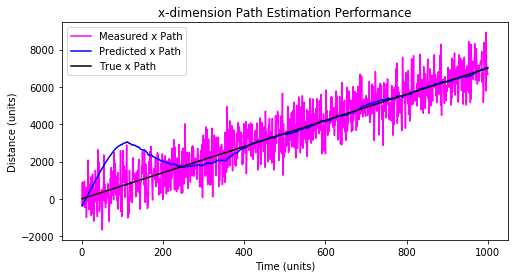

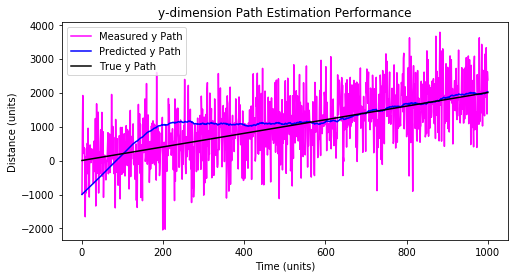

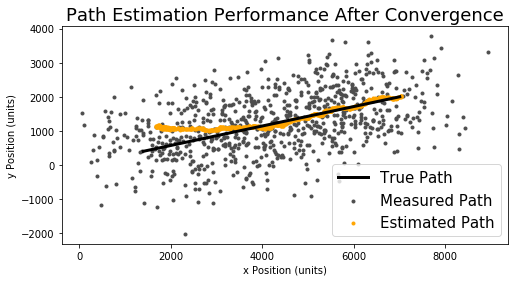

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot([t for t in range(len(x_pos_noisy))], x_pos_noisy, color='magenta',
        label='Measured x Path')
ax.plot([t for t in range(len(x_predicted_positions))], x_predicted_positions, color='blue', 
        label='Predicted x Path')
ax.plot([t for t in range(len(x_pos))], x_pos, color='black', 
        label='True x Path')
ax.set_title("x-dimension Path Estimation Performance")
ax.set_xlabel("Time (units)")
ax.set_ylabel("Distance (units)")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot([t for t in range(len(y_pos_noisy))], y_pos_noisy, color='magenta',
        label='Measured y Path')
ax.plot([t for t in range(len(y_predicted_positions))], y_predicted_positions, color='blue', 
        label='Predicted y Path')
ax.plot([t for t in range(len(y_pos))], y_pos, color='black', 
        label='True y Path')
ax.set_title("y-dimension Path Estimation Performance")
ax.set_xlabel("Time (units)")
ax.set_ylabel("Distance (units)")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
font = {
    'size': 15
}
plt.rc('font', **font)
ax.scatter(x_pos_noisy[200:], y_pos_noisy[200:], marker='.', color='0.3', label='Measured Path')
ax.scatter(x_predicted_positions[200:], y_predicted_positions[200:], marker='.', color='orange', label='Estimated Path')
ax.plot(x_pos[200:], y_pos[200:], color='black', label='True Path', linewidth='3')
ax.set_title("Path Estimation Performance After Convergence")
ax.set_xlabel("x Position (units)")
ax.set_ylabel("y Position (units)")
plt.legend()
plt.savefig('foo.eps', bbox_inches='tight')
plt.show()
